<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

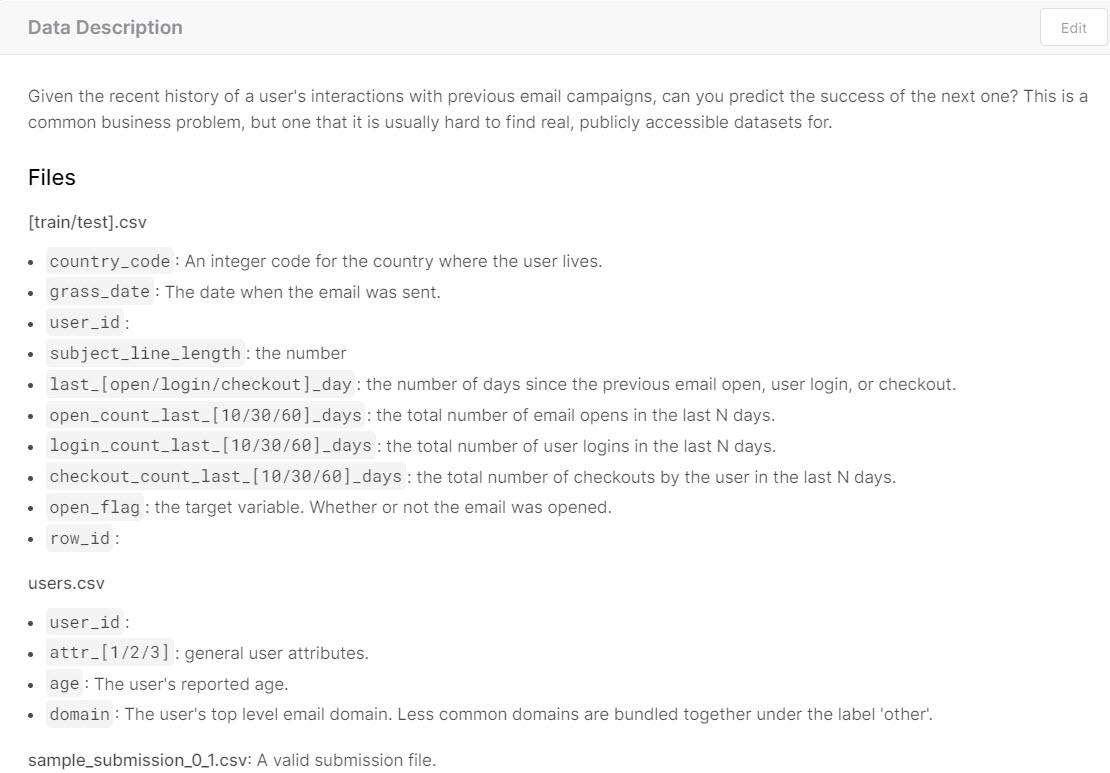

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# Data Exploration Analysis (EDA)

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import utils
from datetime import date

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [3]:
def dummy(X, col_name):
    dummy_df = pd.get_dummies(X[col_name], prefix=col_name)
    X = X.join(dummy_df)
    X.drop(col_name, axis=1, inplace=True)

    return X

def maxOfNever(df, col_name):
    return df[df[col_name].str.find('Never')==-1][col_name].astype('int64').max()

def rowsWithValues(df, col_name):
    return df[df[col_name].str.find('Never')==-1][col_name].astype('int64')

def updateNever(df, col_name, value):
    df.loc[df[col_name].str.find('Never')==0,col_name] = value

## Reading in the dataset

Reading User data

In [4]:
#Read the csv file 
user_df = pd.read_csv('data/users.csv')

In [5]:
user_df

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [6]:
user_df.shape

(127886, 6)

In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


#### Checking for null data :
- age and attr_1 contribute to about 40% null data

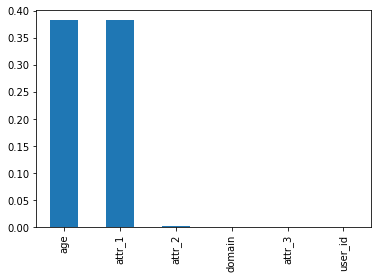

In [8]:
user_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

reading trainng data

In [9]:
#Read the csv file 
train_df = pd.read_csv('data/train.csv', index_col=['row_id'])

In [10]:
train_df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
row_id,,,,,,,,,,,,,,,,,
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0


In [11]:
train_df.shape

(73539, 17)

In [12]:
train_df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag'],
      dtype='object')

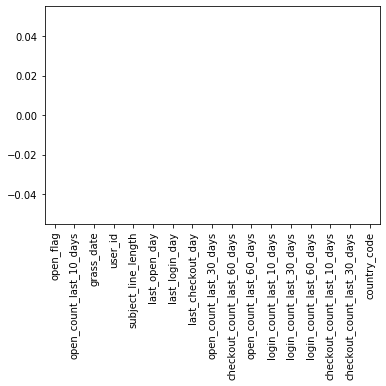

In [13]:
train_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

#### Check for label balancing
- Require upsamplng for class 1

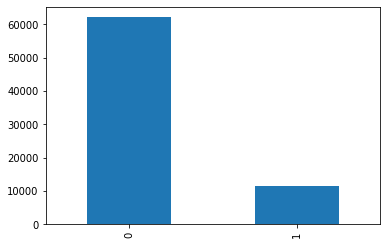

In [14]:
# Get only the raw body text
train_df['open_flag'].value_counts(dropna=False).plot(kind='bar')

### Shuffle the datasets for randomness & Equalised the Bullish and Bearish datasets

In [15]:
train_df['open_flag'].value_counts()

0    62083
1    11456
Name: open_flag, dtype: int64

In [16]:
rating_1 = train_df[train_df.open_flag == 0] 
rating_2 = train_df[train_df.open_flag == 1]

In [17]:
rating_2_upsampled = utils.resample(rating_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=rating_1.shape[0],    # to match majority class
                                 random_state=42)

In [18]:
rating_2_upsampled.shape

(62083, 17)

In [19]:
train_df_upsampled = pd.concat([rating_2_upsampled, rating_1])
train_df_upsampled.shape

(124166, 17)

In [20]:
train_df.shape

(73539, 17)

In [21]:
train_df_upsampled['open_flag'].value_counts()

1    62083
0    62083
Name: open_flag, dtype: int64

In [22]:
train_df_upsampled

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag
row_id,,,,,,,,,,,,,,,,,
45048,4,2019-08-16 00:00:00+08:00,9811,44,1,8,21,3,10,19,5,16,21,0,1,1,1
4975,4,2019-07-19 00:00:00+08:00,30647,46,2,26,156,3,9,18,0,1,4,0,0,0,1
30413,5,2019-08-06 00:00:00+08:00,6455,33,4,1,1,3,11,12,28,44,73,6,7,8,1
29351,4,2019-08-05 00:00:00+08:00,82007,27,2,1,1,3,6,9,9,15,15,3,5,5,1
72314,2,2019-09-02 00:00:00+08:00,87905,38,2,11,19,2,8,19,1,10,27,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73532,1,2019-09-02 00:00:00+08:00,127595,33,8,18,Never checkout,1,3,3,0,0,0,0,0,0,0
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0


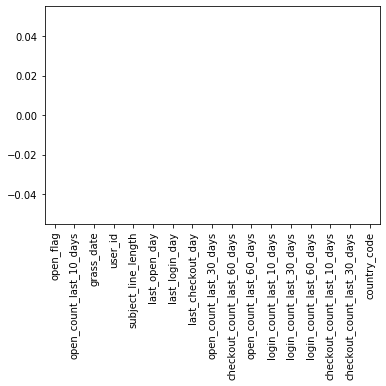

In [23]:
train_df_upsampled.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [24]:
train_df_upsampled.to_csv('data/data_upsampled.csv',index=True)

In [25]:
train_df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124166 entries, 45048 to 73538
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   country_code                 124166 non-null  int64 
 1   grass_date                   124166 non-null  object
 2   user_id                      124166 non-null  int64 
 3   subject_line_length          124166 non-null  int64 
 4   last_open_day                124166 non-null  object
 5   last_login_day               124166 non-null  object
 6   last_checkout_day            124166 non-null  object
 7   open_count_last_10_days      124166 non-null  int64 
 8   open_count_last_30_days      124166 non-null  int64 
 9   open_count_last_60_days      124166 non-null  int64 
 10  login_count_last_10_days     124166 non-null  int64 
 11  login_count_last_30_days     124166 non-null  int64 
 12  login_count_last_60_days     124166 non-null  int64 
 13  checkout_co

### Merge User ID data with training data

Merge for dataset 1 & 2

In [26]:
training_df = pd.merge(left=user_df, right=train_df_upsampled, left_on=['user_id'], right_on='user_id')
training_df.shape

(124166, 22)

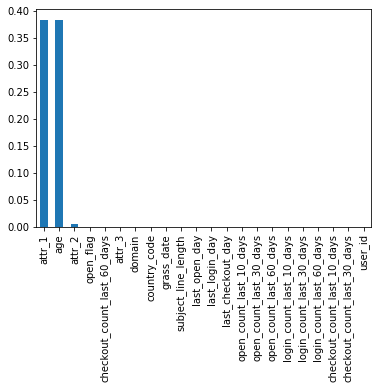

In [27]:
training_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Create new features and convert to date format for date feature
### Encode Category feature

In [28]:
training_df['grass_date']=pd.to_datetime(training_df['grass_date'])
training_df['weekday'] = training_df['grass_date'].apply(lambda x: x.weekday())
training_df = dummy(training_df, 'domain')
training_df = dummy(training_df, 'country_code')

In [29]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124166 entries, 0 to 124165
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype                                
---  ------                       --------------   -----                                
 0   user_id                      124166 non-null  int64                                
 1   attr_1                       76540 non-null   float64                              
 2   attr_2                       123564 non-null  float64                              
 3   attr_3                       124166 non-null  float64                              
 4   age                          76540 non-null   float64                              
 5   grass_date                   124166 non-null  datetime64[ns, pytz.FixedOffset(480)]
 6   subject_line_length          124166 non-null  int64                                
 7   last_open_day                124166 non-null  object                               

In [30]:
training_df.describe(include='all')

,user_id,attr_1,attr_2,attr_3,age,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
count,124166.000000,76540.000000,123564.000000,124166.000000,76540.000000,124166,124166.000000,124166,124166,124166,...,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000
unique,NaN,NaN,NaN,NaN,NaN,47,NaN,549,893,947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2019-09-02 00:00:00+08:00,NaN,1,1,Never checkout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,6436,NaN,15754,19112,27200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2019-07-16 00:00:00+08:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-09-02 00:00:00+08:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62772.349637,0.999504,0.997467,1.063447,32.596668,NaN,42.985431,NaN,NaN,NaN,...,0.074086,0.002859,0.022631,0.312018,0.205290,0.176143,0.129577,0.087810,0.050883,0.038279
std,35822.216995,0.022276,0.050266,1.024140,12.805854,NaN,11.134173,NaN,NaN,NaN,...,0.261912,0.053394,0.148725,0.463319,0.403915,0.380944,0.335838,0.283019,0.219761,0.191871
min,2.000000,0.000000,0.000000,0.000000,-17.000000,NaN,10.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32080.250000,1.000000,1.000000,0.000000,25.000000,NaN,34.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Check max value for the replacement for the text 

In [31]:
print('last_open_day:',maxOfNever(training_df, 'last_open_day'))
print('last_login_day:',maxOfNever(training_df, 'last_login_day'))
print('last_checkout_day:',maxOfNever(training_df, 'last_checkout_day'))

last_open_day: 808
last_login_day: 18141
last_checkout_day: 1445


Replace with max value 

In [32]:
updateNever(training_df, 'last_open_day', 1000)
updateNever(training_df, 'last_login_day', 20000)
updateNever(training_df, 'last_checkout_day', 2000)

In [33]:
training_df['last_open_day']=training_df['last_open_day'].astype('int64')
training_df['last_login_day']=training_df['last_login_day'].astype('int64')
training_df['last_checkout_day']=training_df['last_checkout_day'].astype('int64')

In [34]:
training_df.describe(include='all')

,user_id,attr_1,attr_2,attr_3,age,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
count,124166.000000,76540.000000,123564.000000,124166.000000,76540.000000,124166,124166.000000,124166.000000,124166.000000,124166.000000,...,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000,124166.000000
unique,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2019-09-02 00:00:00+08:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,6436,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2019-07-16 00:00:00+08:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-09-02 00:00:00+08:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62772.349637,0.999504,0.997467,1.063447,32.596668,NaN,42.985431,98.891766,149.918553,494.693926,...,0.074086,0.002859,0.022631,0.312018,0.205290,0.176143,0.129577,0.087810,0.050883,0.038279
std,35822.216995,0.022276,0.050266,1.024140,12.805854,NaN,11.134173,264.392775,1426.475194,805.384048,...,0.261912,0.053394,0.148725,0.463319,0.403915,0.380944,0.335838,0.283019,0.219761,0.191871
min,2.000000,0.000000,0.000000,0.000000,-17.000000,NaN,10.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32080.250000,1.000000,1.000000,0.000000,25.000000,NaN,34.000000,3.000000,2.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
train_df_copy = training_df.copy()

In [36]:
training_df.to_csv('data/training_data_all_features.csv',index=False)

### Create 2 datasets
- 1. Datasets dropping nulls row in column attr_1, age & attr_2
- 2. Datasets dropping column attr_1 and age


#### Dataset 1 : Drop empty rows data in column attr_1 and age

In [37]:
training_df.dropna(subset = ["attr_1"], inplace=True)

In [38]:
training_df.shape

(76540, 39)

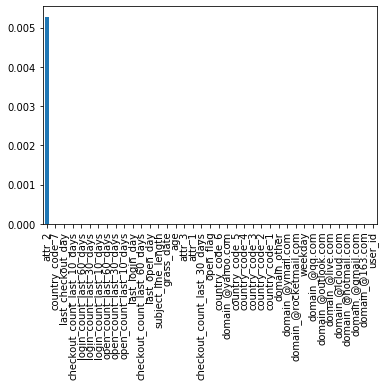

In [39]:
training_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

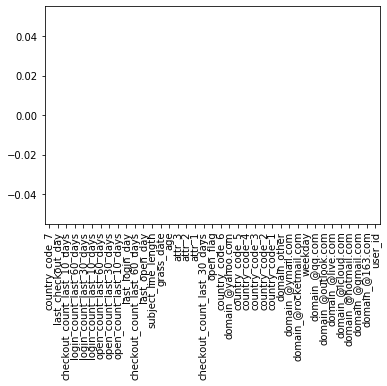

In [40]:
training_df.dropna(subset = ["attr_2"], inplace=True)
training_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [41]:
# Drop useless features
X = training_df.drop(['grass_date', 'user_id'], axis=1)

In [42]:
X.to_csv('data/dataset1.csv',index=False)

In [43]:
X.shape

(76136, 37)

#### Dataset 2 : Dropping column attr_1 and age

In [44]:
train_df_copy.shape

(124166, 39)

In [45]:
train_copy_drop = train_df_copy.drop(['attr_1', 'age'], axis=1)

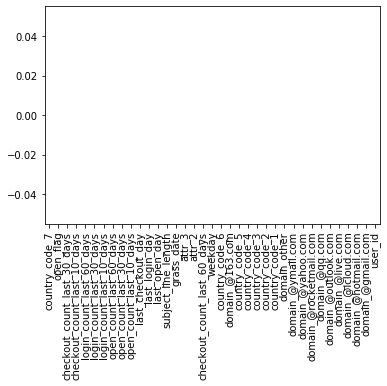

In [46]:
train_copy_drop.dropna(subset = ["attr_2"], inplace=True)
train_copy_drop.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [47]:
# Drop useless features
X = train_copy_drop.drop(['grass_date', 'user_id'], axis=1)

In [48]:
X.shape

(123564, 35)

In [49]:
X.to_csv('data/dataset2.csv',index=False)